# CPU Scheduling Algorithms

**Manan Suri | 2020UCO1696**

**Why do we need to schedule processes?**

Scheduling is important in many different computer environments. One of the most important areas is scheduling which programs will work on the CPU. This task is handled by the Operating System (OS) of the computer and there are many different ways in which we can choose to configure programs.
Process Scheduling allows the OS to allocate CPU time for each process. Another important reason to use a process scheduling system is that it keeps the CPU busy at all times. This allows you to get less response time for programs. 
Considering that there may be hundreds of programs that need to work, the OS must launch the program, stop it, switch to another program, etc. The way the OS configures the system to run another in the CPU is called “context switching”. If the OS keeps context-switching programs in and out of the provided CPUs, it can give the user a tricky idea that he or she can run any programs he or she wants to run, all at once.
So now that we know we can run 1 program at a given CPU, and we know we can change the operating system and remove another one using the context switch, how do we choose which programs we need. run, and with what program?
That’s where scheduling comes in! First, you determine the metrics, saying something like “the amount of time until the end”. We will define this metric as “the time interval between which a function enters the system until it is completed”. Second, you decide on a metrics that reduces metrics. We want our tasks to end as soon as possible.

**Objectives of Process Scheduling Algorithm:**

* Utilization of CPU at maximum level.  Keep CPU as busy as possible.
* Allocation of CPU should be fair.
* Throughput should be Maximum. i.e. Number of processes that complete their execution per time unit should be maximized.
* Minimum turnaround time, i.e. time taken by a process to finish execution should be the least.
* There should be a minimum waiting time and the process should not starve in the ready queue.
* Minimum response time. It means that the time when a process produces the first response should be as less as possible.


**What are the different terminologies to take care of in any CPU Scheduling algorithm?**

* Arrival Time: Time at which the process arrives in the ready queue.
* Completion Time: Time at which process completes its execution.
* Burst Time: Time required by a process for CPU execution.
* Turn Around Time: Time Difference between completion time and arrival time.



In [30]:
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

## Generating Dataset

In [42]:
BurstTime = []
priorities = []
n = 10000
maxTime = 50

quant = maxTime/10

for i in range(0,n):
  rand = maxTime*random.random() + 1
  BurstTime.append(rand)
  pri = math.floor(0.3*n*(random.random())+1)
  priorities.append(pri)


## CPU Scheduling Algorithms

### First Come First Serve Algorithm

First come first serve scheduling algorithm states that the process that requests the CPU first is allocated the CPU first. It is implemented by using the FIFO queue. When a process enters the ready queue, its PCB is linked onto the tail of the queue. When the CPU is free, it is allocated to the process at the head of the queue. The running process is then removed from the queue. FCFS is a non-preemptive scheduling algorithm.

**Characteristics of FCFS:**
* FCFS supports non-preemptive and preemptive CPU scheduling algorithm.
* Tasks are always executed on a First-come, First-serve concept.
* FCFS is easy to implement and use.
* This algorithm is not much efficient in performance, and the wait time is quite high.

**How First Come First Serve CPU Scheduling Algorithm works?**
* The waiting time for first process is 0 as it is executed first.
* The waiting time for upcoming process can be calculated by: 

In [43]:
# First come First served Algorithm
def FCFS(data,n):
    Twt = 0.0
    Bst = 0.0
    Tat = 0.0
    Wt = [0]
    B = list(data)
    for i in range(1, int(n)):
        temp = int(B[i - 1]) + int(Wt[i - 1])
        Wt.append(temp)
    for i in range(0, int(n)):
        Twt = Twt + Wt[i]
    for i in range(0, int(n)):
        Bst = Bst + Wt[i]
    for i in range(0, int(n)):
        Tat = Wt[i]+int(B[i])

    print("Total Waiting Time:"+str(Twt))
    print("Average Waiting Time:"+str(Twt/int(n)))
    print("Total Turnaround Time:"+str(Tat))
    print("Average Turnaround Time:"+str(Tat/int(n)))

    return [Twt, Twt/n, Tat, Tat/n]

### Shortest Job First Algorithm

Shortest job first (SJF) or shortest job next, is a scheduling policy that selects the waiting process with the smallest execution time to execute next. SJN is a non-preemptive algorithm. 
 

* Shortest Job first has the advantage of having a minimum average waiting time among all scheduling algorithms.
* It is a Greedy Algorithm.
* It may cause starvation if shorter processes keep coming. This problem can be solved using the concept of ageing.
* It is practically infeasible as Operating System may not know burst time and therefore may not sort them. While it is not possible to predict execution time, several methods can be used to estimate the execution time for a job, such as a weighted average of previous execution times. SJF can be used in specialized environments where accurate estimates of running time are available.

In [44]:

# Shortest job First Algorithm
def SJF(data,n):
    # Sort the brust time
    Twt = 0.0
    Bst = 0.0
    aTat = 0.0
    Wt = [0]
    Tat = [0]
    B = list(data)
    for i in range(int(n), 0, -1):
        for j in range(1, int(n)):
            if B[j - 1] > B[j]:
                temp = B[j - 1]
                B[j - 1] = B[j]
                B[j] = temp
    Wt = [0]
    for i in range(1, int(n)):
        temp = int(B[i - 1]) + int(Wt[i - 1])
        Wt.append(temp)
    for i in range(0, int(n)):
        Twt = Twt + Wt[i]
    for i in range(0, int(n)):
        Bst = Bst + Wt[i]
    for i in range(0, int(n)):
        Tat = Wt[i]+int(B[i])

    print("Total Waiting Time:"+str(Twt))
    print("Average Waiting Time:"+str(Twt/int(n)))
    print("Total Turnaround Time:"+str(Tat))
    print("Average Turnaround Time:"+str(Tat/int(n)))
    return [Twt, Twt/n, Tat, Tat/n]


###Priority Algoritm

Priority scheduling is one of the most common scheduling algorithms in batch systems. Each process is assigned a priority. Process with the highest priority is to be executed first and so on. 
Processes with the same priority are executed on first come first served basis. Priority can be decided based on memory requirements, time requirements or any other resource requirement.

In [45]:

# Priority Algorithm
def Priority(data, priority,n):
    Twt = 0.0
    Bst = 0.0
    Tat = 0.0
    w = 0.0
    B = data
    P = priority

    pMax = 6

    Wt = [0]*n


    for j in range(pMax):
        for i in range(0, n):
            if P[i] ==j:
                Wt[i] = w
                w = w+B[i]
    for i in range(0, int(n)):
        Twt = Twt + Wt[i]
    for i in range(0, int(n)):
        Bst = Bst + Wt[i]
    for i in range(0, int(n)):
        Tat = Wt[i]+int(B[i])

    print("Total Waiting Time:"+str(Twt))
    print("Average Waiting Time:"+str(Twt/int(n)))
    print("Total Turnaround Time:"+str(Tat))
    print("Average Turnaround Time:"+str(Tat/int(n)))
    return [Twt, Twt/n, Tat, Tat/n]



### Round robin Algorithm

Priority scheduling is one of the most common scheduling algorithms in batch systems. Each process is assigned a priority. Process with the highest priority is to be executed first and so on. 
Processes with the same priority are executed on first come first served basis. Priority can be decided based on memory requirements, time requirements or any other resource requirement.

In [46]:
# Round Robin Algorithm
def RoundRobin(data,n, quant):
    Twt = 0
    Bst = 0.0
    w = 0.0
    Tat = [0]
    aTat = 0.0
    Wt = [0]
    quantum = quant
    B = list(data)
    rem_bt = list(data)
    t = 0 # Current time
    while(1):
        done = True
        for i in range(int(n) ):
            if (int(rem_bt[i]) > 0) :
                done = False # There is a pending process
                if (int(rem_bt[i]) > quantum) :
                    t += quantum
                    rem_bt[i] = int(rem_bt[i]) - quantum  
                else:
                    t = t + int(rem_bt[i])
                    Wt.append(t - int(B[i]))
                    rem_bt[i] = 0
        if (done == True):
            break
    for i in range(int(n)+1):
        Twt = int(Twt) + int(Wt[i])
    for i in range(int(n)):
        temp = int(B[i]) + int(Wt[i])
        Tat.append(temp)
        aTat = aTat + Tat[i]

    print("Total Waiting Time:"+str(Twt))
    print("Average Waiting Time:"+str(Twt/int(n)))
    print("Total Turnaround Time:"+str(aTat))
    print("Average Turnaround Time:"+str(aTat/int(n)))
    return [Twt, Twt/n, aTat, aTat/n]


## Calling Different Algorithms on same Data

In [47]:
fcfs = FCFS(BurstTime,n)

Total Waiting Time:1265474326.0
Average Waiting Time:126547.4326
Total Turnaround Time:253562
Average Turnaround Time:25.3562


In [48]:
sjf = SJF(BurstTime,n)

Total Waiting Time:850032093.0
Average Waiting Time:85003.2093
Total Turnaround Time:253562
Average Turnaround Time:25.3562


In [49]:
prty = Priority(BurstTime, priorities,n)

Total Waiting Time:5415.45847934495
Average Waiting Time:0.541545847934495
Total Turnaround Time:13
Average Turnaround Time:0.0013


In [50]:
rr = RoundRobin(BurstTime, n, quant)

Total Waiting Time:1669955242
Average Waiting Time:166995.5242
Total Turnaround Time:1669701763.0
Average Turnaround Time:166970.1763


## Visualisation of Results

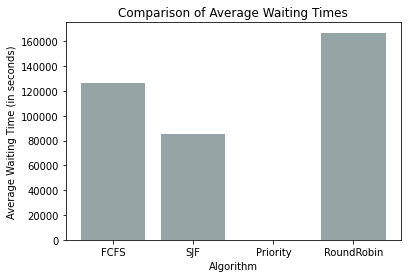

In [51]:
# Average Waiting Time

data = [fcfs[1] ,sjf[1], prty[1], rr[1]]
plt.bar(["FCFS","SJF","Priority","RoundRobin"], data, color='#95a5a6')
plt.xlabel('Algorithm')
plt.ylabel('Average Waiting Time (in seconds)')
plt.title('Comparison of Average Waiting Times')
plt.show()

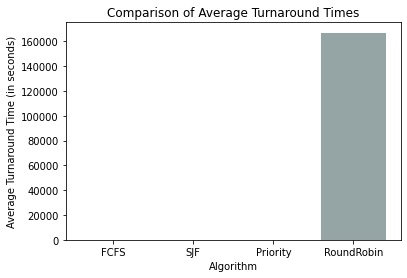

In [52]:
# Average Turnaround Time

data = [fcfs[3] ,sjf[3], prty[3], rr[3]]
plt.bar(["FCFS","SJF","Priority","RoundRobin"], data, color='#95a5a6')
plt.xlabel('Algorithm')
plt.ylabel('Average Turnaround Time (in seconds)')
plt.title('Comparison of Average Turnaround Times')
plt.show()